In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

   RecordID         AQI        PM10       PM2_5         NO2        SO2  \
0         1  187.270059  295.853039   13.038560    6.639263  66.161150   
1         2  475.357153  246.254703    9.984497   16.318326  90.499523   
2         3  365.996971   84.443191   23.111340   96.317811  17.875850   
3         4  299.329242   21.020609   14.273403   81.234403  48.323616   
4         5   78.009320   16.987667  152.111623  121.235461  90.866167   

           O3  Temperature   Humidity  WindSpeed  RespiratoryCases  \
0   54.624280     5.150335  84.424344   6.137755                 7   
1  169.621728     1.543378  46.851415   4.521422                10   
2    9.006794     1.169483  17.806977  11.157384                13   
3   93.161033    21.925276  99.473373  15.302500                 8   
4  241.795138     9.217517  24.906837  14.534733                 9   

   CardiovascularCases  HospitalAdmissions  HealthImpactScore  \
0                    5                   1          97.244041   
1   

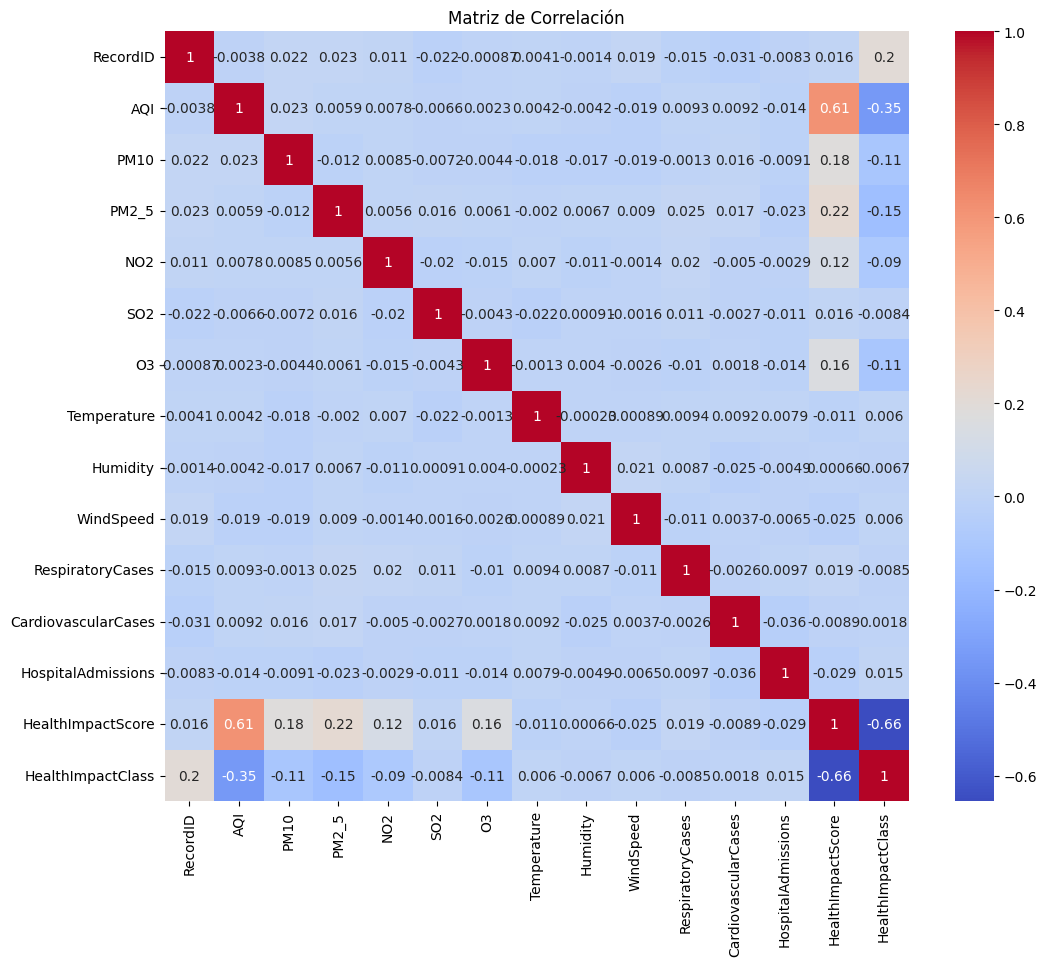

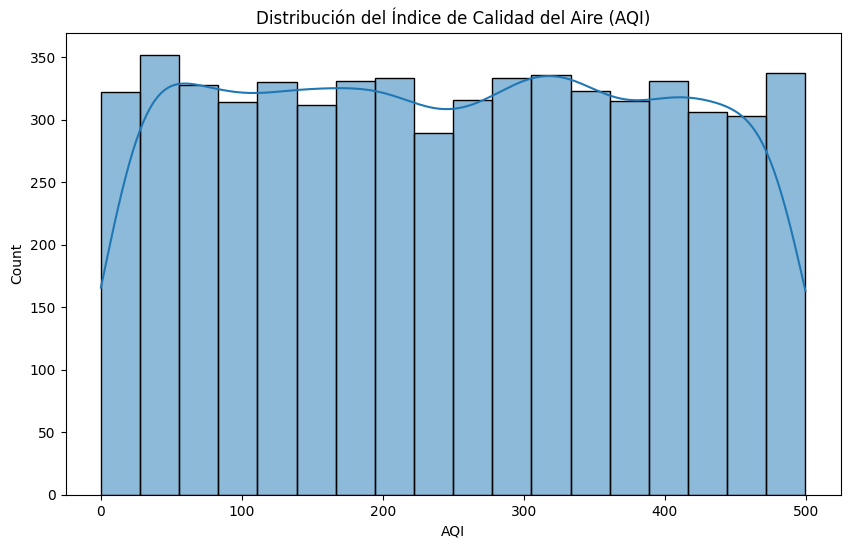

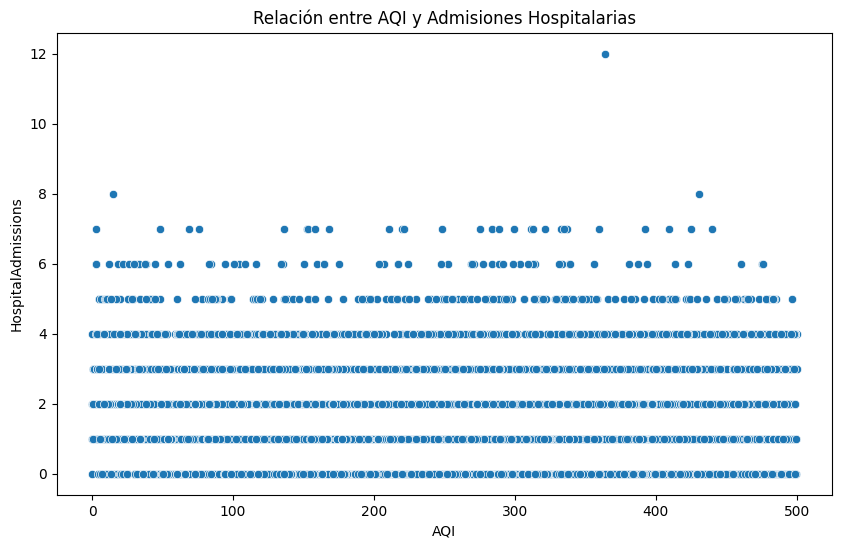

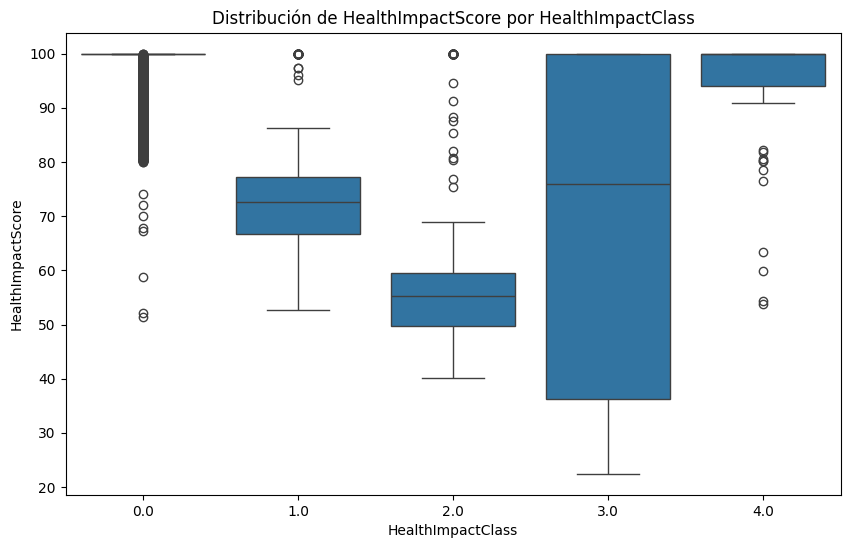

In [2]:
# Cargar los datos
df = pd.read_csv('air_quality_health_impact_data.csv')

# Mostrar las primeras filas y la información del DataFrame
print(df.head())
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

# Correlación entre variables
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Distribución de AQI
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], kde=True)
plt.title('Distribución del Índice de Calidad del Aire (AQI)')
plt.xlabel('AQI')
plt.show()

# Relación entre AQI y HospitalAdmissions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AQI', y='HospitalAdmissions', data=df)
plt.title('Relación entre AQI y Admisiones Hospitalarias')
plt.show()

# Boxplot de HealthImpactScore por HealthImpactClass
plt.figure(figsize=(10, 6))
sns.boxplot(x='HealthImpactClass', y='HealthImpactScore', data=df)
plt.title('Distribución de HealthImpactScore por HealthImpactClass')
plt.show()

In [3]:
# Preprocesamiento de datos

# 1. Manejo de valores nulos (si los hay)
if df.isnull().sum().sum() > 0:
    df = df.dropna()  # O considerar imputación si es apropiado

# 2. Conversión de tipos de datos si es necesario
df['HealthImpactClass'] = df['HealthImpactClass'].astype('category')

# 3. Normalización de características numéricas
scaler = StandardScaler()
numeric_columns = ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# 4. Codificación one-hot para variables categóricas (si es necesario)
df = pd.get_dummies(df, columns=['HealthImpactClass'], drop_first=True)

# 5. Eliminación de características altamente correlacionadas o irrelevantes
# Por ejemplo, si RecordID no es relevante para el análisis:
df = df.drop('RecordID', axis=1)

print(df.head())
print(df.info())

        AQI      PM10     PM2_5       NO2       SO2        O3  Temperature  \
0 -0.422535  1.717775 -1.500822 -1.657549  0.585544 -1.094322    -0.678448   
1  1.567495  1.138971 -1.553395 -1.489825  1.438687  0.234717    -0.927516   
2  0.812063 -0.749340 -1.327427 -0.103549 -1.107022 -1.621528    -0.953334   
3  0.351540 -1.489470 -1.479565 -0.364923 -0.039723 -0.648948     0.479897   
4 -1.177280 -1.536534  0.893208  0.328238  1.451539  1.068833    -0.397601   

   Humidity  WindSpeed  RespiratoryCases  CardiovascularCases  \
0  1.139475  -0.666745                 7                    5   
1 -0.304607  -0.946559                10                    2   
2 -1.420905   0.202236                13                    3   
3  1.717872   0.919824                 8                    8   
4 -1.148028   0.786911                 9                    0   

   HospitalAdmissions  HealthImpactScore  HealthImpactClass_1.0  \
0                   1          97.244041                  False   
1     

In [4]:
# Guardar el conjunto de datos preprocesado
df.to_csv('preprocessed_air_quality_data.csv', index=False)

In [5]:
# Modelado de Machine Learning

# Separar características y variable objetivo
X = df.drop('HealthImpactScore', axis=1)
y = df['HealthImpactScore']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio: {mse}")
print(f"R² Score: {r2}")

Error cuadrático medio: 46.26157335766228
R² Score: 0.753095145729243


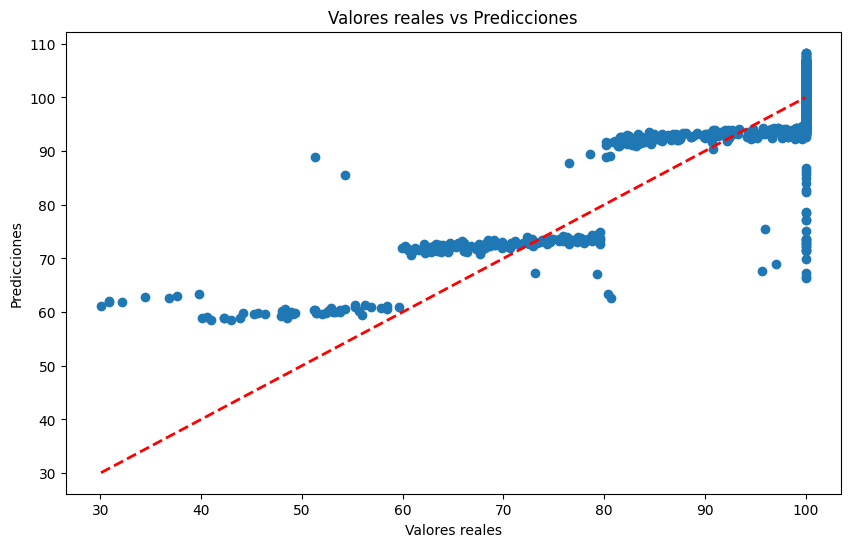

In [6]:
# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')
plt.show()

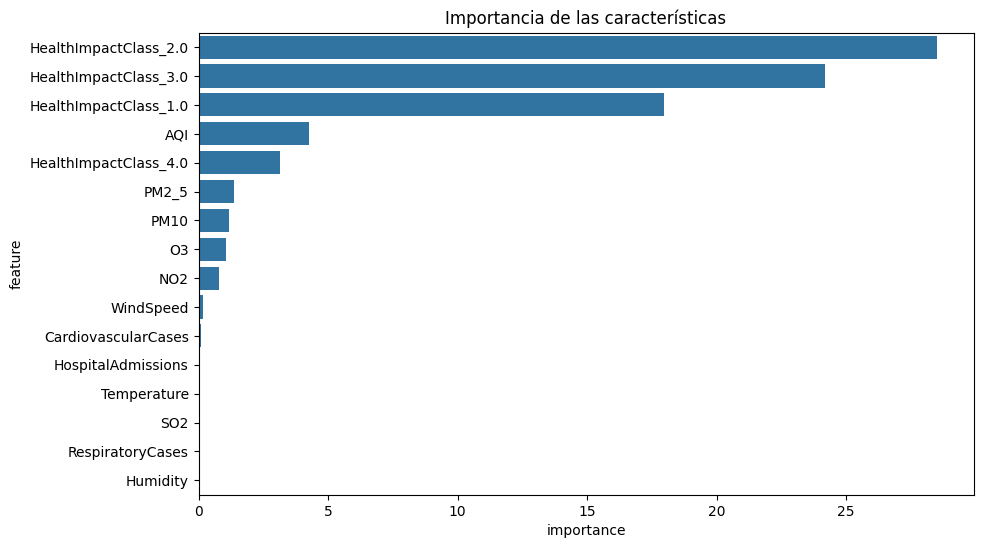

In [7]:
# Importancia de las características
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importancia de las características')
plt.show()